# Práctica 4: tranformación de datos numéricos

## Descripción del dataset

### big five personality

<img src="big_five.png">

el dataset big-five-personality-test contenido en https://www.kaggle.com/tunguz/big-five-personality-test

Para esta practica se consideraran las variables discretas con el siguiente formato, debido a que sus respuestas están en valores de 0 a 5

EXT - Questions to measure Extroversion

AGR - Questions to measure Agreeableness

CSN - Questions to measure Conscientiousness

EST - Questions to measure Neuroticism

OPN - Questions to measure Openness to Experience

y las variables continuas el tiempo que en el que contestaron, el tiempo de ingreso y el tiempo de salida


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data-final.csv",sep="\t")
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## Recipe

### Transformación de variables numéricas

La transformación de datos es una forma de hacer que los datos funcionen mejor en los métodos de aprendizaje automático. Las variables o características pueden ser de dos tipos: variable numérica y variable categórica, y su transformación debe tener diferentes enfoques.

Convertir una variable numérica en otra variable numérica. Típicamente, su objetivo es cambiar la escala de valores y/o ajustar la distribución sesgada de los datos 

In [3]:
varc = [x for x in df.columns if (x[-2:] == '_E' or x == 'introelapse' or x == 'testelapse' or x == 'endelapse')]
vard = [x[:-2] for x in varc if x[-2:] == '_E']
print("Caracteristicas categoricas")
print(vard)
print()
print("Caracteriticas continuas")
print(varc)
X = df[varc].copy()

Caracteristicas categoricas
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

Caracteriticas continuas
['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'introelapse', 'testelapse', 'ende

#### StandardScaler

La transformación más típica de una variable numérica es la transformación de los valores de la variable a otro conjunto de valores con media μ=0 y desviación estándar σ=1

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
for i in range(len(varc)):
    print("La variable "+str(varc[i]))
    print("media: "+str(scaler.mean_[i]))
    print("varianza: "+str(scaler.var_[i]))
    print()
Xs1 = pd.DataFrame(scaler.transform(X),columns=varc)

La variable EXT1_E
media: 97019.95242896806
varianza: 23891006320684.13

La variable EXT2_E
media: 8341.047872938698
varianza: 316442140735.06445

La variable EXT3_E
media: 11641.235578033029
varianza: 5420103287293.852

La variable EXT4_E
media: 7645.369126384479
varianza: 114369683206.65953

La variable EXT5_E
media: 7143.987860586172
varianza: 362859581432.2757

La variable EXT6_E
media: 7453.52278014677
varianza: 322116307134.2921

La variable EXT7_E
media: 10899.226462619801
varianza: 4796638022186.8

La variable EXT8_E
media: 7039.181774501311
varianza: 135623163940.8154

La variable EXT9_E
media: 6157.744185335225
varianza: 61578783331.2592

La variable EXT10_E
media: 7417.393350947849
varianza: 4600957265870.964

La variable EST1_E
media: 9434.204708561325
varianza: 1541342665640.8745

La variable EST2_E
media: 9247.126312455724
varianza: 393354480185.1631

La variable EST3_E
media: 7728.743590401338
varianza: 503999127158.7789

La variable EST4_E
media: 12843.81584477652
varia

In [5]:
Xs1.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
0,-0.017922,-0.005066,-0.003300,-0.008352,-0.002545,-0.008277,-0.003886,-0.013377,-0.001039,-0.001542,...,-0.003241,-0.012044,-0.005913,-0.005569,-0.008776,-0.007755,-0.002228,-0.018614,-0.021876,-0.001816
1,-0.018369,-0.008432,-0.003576,-0.015025,-0.006919,-0.007759,-0.002791,-0.010349,-0.010851,-0.001915,...,-0.003368,-0.004510,-0.008720,-0.008510,-0.007795,-0.007513,-0.005257,-0.018556,-0.024601,-0.001813
2,-0.018896,-0.008519,-0.003908,-0.012746,-0.002153,-0.008657,-0.002729,-0.010582,0.034105,-0.002437,...,-0.003808,-0.011871,-0.000253,-0.009665,0.003312,-0.011028,-0.006368,-0.018732,-0.024255,-0.001816
3,-0.019032,-0.009680,-0.002811,-0.010070,-0.003280,-0.003520,-0.002986,-0.006906,-0.003698,-0.001593,...,-0.003137,-0.006309,-0.007941,-0.008055,-0.004685,-0.006620,-0.004717,-0.015146,-0.022619,-0.001816
4,-0.018621,-0.007779,-0.003832,-0.011649,-0.006933,-0.008858,-0.001626,-0.010148,0.042963,-0.001719,...,-0.002054,-0.011584,-0.004292,-0.001444,-0.000395,0.011806,0.007499,-0.018634,-0.017862,-0.001809


#### Escala min-max

La escala mín-máx es otra de las simples transformaciones de las variables numéricas. Con la escala mín-máx, los valores deben ser convertidos a los valores dentro de [0,1].
Donde xmax es el valor máximo, y xmin es el valor mínimo.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
for i in range(len(varc)):
    print("La variable "+str(varc[i]))
    print("min: "+str(scaler.data_max_[i]))
    print("max: "+str(scaler.data_min_[i]))
    print()
Xs2 = pd.DataFrame(scaler.transform(X),columns=varc)

La variable EXT1_E
min: 2147483647.0
max: -42958762.0

La variable EXT2_E
min: 261773449.0
max: -75632.0

La variable EXT3_E
min: 2147483647.0
max: -3593866.0

La variable EXT4_E
min: 168711199.0
max: -2494907.0

La variable EXT5_E
min: 351067965.0
max: -58566.0

La variable EXT6_E
min: 316490638.0
max: -79860.0

La variable EXT7_E
min: 2147483647.0
max: -3594255.0

La variable EXT8_E
min: 247706204.0
max: -461138.0

La variable EXT9_E
min: 180369402.0
max: -59370.0

La variable EXT10_E
min: 2147483647.0
max: -142238.0

La variable EST1_E
min: 1112743534.0
max: -112165.0

La variable EST2_E
min: 429923703.0
max: -71572.0

La variable EST3_E
min: 525072378.0
max: -41381.0

La variable EST4_E
min: 2147483647.0
max: -3598047.0

La variable EST5_E
min: 2147483647.0
max: -88286.0

La variable EST6_E
min: 346412854.0
max: -3574100.0

La variable EST7_E
min: 193147784.0
max: -2520786.0

La variable EST8_E
min: 2147483647.0
max: -3599692.0

La variable EST9_E
min: 313106990.0
max: -79175662.0


In [7]:
Xs2.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
0,0.019616,0.000310,0.001673,0.014601,0.000183,0.000261,0.001672,0.001867,0.000362,0.000068,...,0.000036,0.000801,0.025489,0.000170,0.000313,0.000285,0.010648,3.056746e-07,0.000020,3.348228e-09
1,0.019615,0.000303,0.001672,0.014588,0.000175,0.000262,0.001673,0.001871,0.000348,0.000068,...,0.000036,0.000816,0.025483,0.000166,0.000315,0.000285,0.010644,4.075662e-07,0.000015,6.696457e-09
2,0.019614,0.000302,0.001672,0.014592,0.000183,0.000260,0.001673,0.001871,0.000410,0.000067,...,0.000035,0.000801,0.025500,0.000164,0.000332,0.000281,0.010642,1.018915e-07,0.000016,4.017874e-09
3,0.019614,0.000300,0.001673,0.014597,0.000182,0.000270,0.001673,0.001876,0.000358,0.000068,...,0.000036,0.000813,0.025485,0.000166,0.000319,0.000287,0.010645,6.317276e-06,0.000018,4.017874e-09
4,0.019615,0.000304,0.001672,0.014594,0.000175,0.000260,0.001674,0.001871,0.000422,0.000068,...,0.000038,0.000802,0.025492,0.000176,0.000326,0.000309,0.010661,2.717108e-07,0.000026,1.071433e-08


Esta transformación depende en gran medida del número máximo y del número mínimo y, por lo tanto, es particularmente sensible a los valores atípicos.

#### Recorte

El recorte (clipping) es un enfoque para limitar o reducir los valores en puntos de valor específicos. Esto puede eliminar los valores atípicos, a costa de una posible pérdida de información de datos. El recorte se puede hacer fácilmente por medio de la función de clip de pandas o numpy. El siguiente código recorta los valores en el 1% y el 99% de los datos.

In [8]:
p25 = X.quantile(0.25)
p75 = X.quantile(0.75)
print("p01:\n", p25)
print()
print("p99:\n", p75)

p01:
 EXT1_E         4795.00
EXT2_E         2384.00
EXT3_E         2462.00
EXT4_E         2403.00
EXT5_E         2119.00
EXT6_E         2176.00
EXT7_E         3048.00
EXT8_E         2533.00
EXT9_E         2587.00
EXT10_E        2255.00
EST1_E         2208.00
EST2_E         2480.00
EST3_E         1927.00
EST4_E         2448.00
EST5_E         2456.00
EST6_E         2191.00
EST7_E         2183.00
EST8_E         2071.00
EST9_E         1921.00
EST10_E        1760.00
AGR1_E         2895.00
AGR2_E         2246.00
AGR3_E         2224.00
AGR4_E         2190.00
AGR5_E         2917.00
AGR6_E         1998.00
AGR7_E         2652.00
AGR8_E         2659.00
AGR9_E         2206.00
AGR10_E        2379.00
CSN1_E         2368.00
CSN2_E         2955.00
CSN3_E         2264.00
CSN4_E         2330.00
CSN5_E         2512.00
CSN6_E         3096.00
CSN7_E         2033.00
CSN8_E         2452.00
CSN9_E         2000.00
CSN10_E        2648.00
OPN1_E         2073.25
OPN2_E         3054.00
OPN3_E         1864.00
OPN4_

Para realizar este metodo se necesito que el dataset este libre de valores nulos

In [9]:
aux = X.fillna(999999)

In [10]:
Xs3 = aux.clip(p25,p75,axis=1).astype('int')
Xs3.head()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse
0,9419,5085,3959,4821,4506,2756,3048,2533,5378,4110,...,3411,2170,4920,4436,3116,2992,3362,9,234,9
1,7235,3598,3315,2564,2976,3050,4787,3228,3465,3309,...,3026,4267,3336,2718,3374,3096,3019,12,179,11
2,4795,3549,2543,3335,4506,2540,4922,3142,5378,2255,...,2680,2229,4945,2279,4469,2329,2529,5,186,9
3,4795,2896,5096,4240,4506,4622,4360,4496,5240,4000,...,3728,4128,3776,2984,4192,3480,3257,30,219,9
4,6004,3965,2721,3706,2968,2426,6300,3302,5378,3731,...,5537,2327,4945,4729,4469,4785,3362,8,313,17


#### Binning

En Binning se agrupan los valores a intervalos distintos, y se utiliza un índice de grupo representativa de cada intervalo como una variable categórica. Se puede usar como una variable categórica ordinal o una variable numérica discreta tipo rango (discretizada). Como variable categórica también se puede trasnformar a numérica, mediante una codificación de un solo golpe (one-hot encoding) u otras transformaciones de variables categóricas.

In [11]:
pd.cut(X['EXT1_E'], bins=10, labels=False).value_counts()

0.0    1013484
1.0         50
2.0         16
3.0          3
5.0          2
9.0          2
4.0          1
Name: EXT1_E, dtype: int64

#### Rango

In [12]:
aux = X.dropna()
aux.reset_index(drop = True,inplace = True)

In [13]:
aux['EXT1_E'].rank().astype('int').value_counts()

4735      9419
233799     149
232123     147
178705     142
269930     140
          ... 
960311       1
964405       1
966452       1
950060       1
997982       1
Name: EXT1_E, Length: 88856, dtype: int64

Si la caracteristica no presenta muchos valores repetidos este metodo aporta poco

#### RankGauss

RankGauss es un enfoque para convertir los valores a rangos, y después convierte estos rangos a otro valor numérico siguiendo una distribución Gaussiana 

In [43]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=1000, random_state=1111, output_distribution='normal')
transformer.fit(X[['testelapse']])
E = pd.DataFrame(transformer.transform(df[['testelapse']]))

In [44]:
E[0].value_counts()

-0.601439    5278
-0.630254    5198
-0.458426    5198
-0.694311    5184
-0.444534    5179
             ... 
 2.832219       1
 2.660142       1
 2.555773       1
 3.102804       1
 2.762983       1
Name: 0, Length: 10849, dtype: int64

/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/diegoias/Documents/CieciaDatos/cdd/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


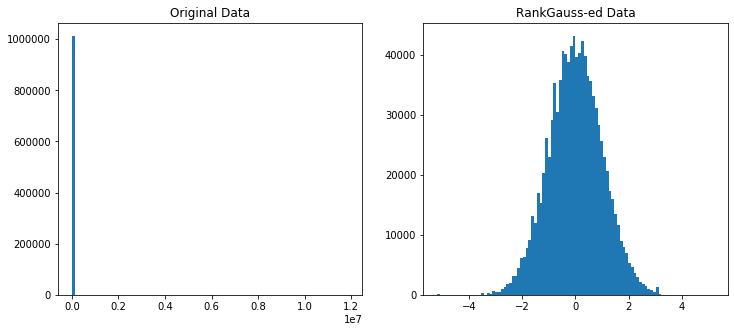

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['testelapse'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(E[0],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()